In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
input_data = np.array([[0,0,0],
                       [0,1,0],
                       [0,0,1],
                       [1,1,0],
                       [1,0,1],
                       [1,1,1]])

In [ ]:
output_data = np.array([[0],
                        [1],
                        [1],
                        [0],
                        [0],
                        [1]])

In [ ]:
def sigmoid(x):
  return (1)/(1+np.exp(-x))

In [ ]:
def dsigmoid(x):
  return x*(1-x)

In [ ]:
np.random.seed(1)
w0 = np.random.random((3,2))-1
w1 = np.random.random((2,1))-1

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1


In [ ]:
def feed_forward(data_in,w0,w1,b0,b1): #forward propogation
  layer0 = data_in
  layer1 = sigmoid(np.dot(layer0,w0)+b0)
  layer2 = sigmoid(np.dot(layer1,w1)+b1)

  return layer0,layer1,layer2

In [ ]:
def back_propogation(layer0,layer1,layer2,actual_y,w0,w1,b0,b1,learning_rate,i):
  l2_error = layer2 - actual_y
  l2_delta = l2_error *dsigmoid(layer2)
  dh2 = np.dot(layer1.T , l2_delta)

  l1_error = np.dot(l2_delta,w1.T)
  l1_delta = l1_error *dsigmoid(layer1)
  dh1 = np.dot(layer0.T,l1_delta)

  w1 = w1 - (learning_rate *dh2)
  w0 = w0 - (learning_rate *dh1)

  b1 = b1 - (learning_rate *np.mean(l2_delta))
  b0 = b0 - (learning_rate *np.mean(l1_delta))

  
  if i%1 == 0 and (i!=0):
    loss = np.mean(np.power(layer2-actual_y,2))
    loss_curve.append(loss)
    iters.append(int(i))

    if i%100 == 0:
      print('\n',int(i),loss)
  return w0,w1,b0,b1


In [ ]:
def accuracy(testx,testy):
  correct = 0
  layer0,layer1,layer2 = feed_forward(testx,w0,w1,b0,b1)
  for i in range(len(testx)):
    if np.argmax(layer2[i])==np.argmax(testy[i]):
      correct += 1
  return f" Accuracy: {correct*100/len(testy)}"

In [ ]:
epochs = 20
loss_curve = []
iters = []


testx = np.array(input_data)
testy = np.array(output_data)

In [ ]:
for i in range(epochs):
  layer0,layer1,layer2 = feed_forward(input_data,w0,w1,b0,b1) #input_data,w0,w1,b0,b1
  w0,w1,b0,b1 = back_propogation(layer0,layer1,layer2,output_data,w0,w1,b0,b1,0.01,i)

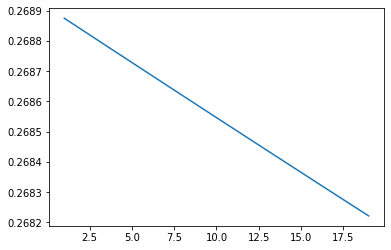

In [ ]:
plt.plot(iters,loss_curve)

In [ ]:
accuracy(testx,testy) 

' Accuracy: 100.0'